In [1]:
clear, clc;
addpath('../MALSAR/utils/')
addpath('../MALSAR/functions/Lasso/')

In [2]:
n = 50;
d = 300;
t = 10;

X = cell(t, 1);
Y = cell(t, 1);
W = randn(d, t);
W(1:5,:)

ans =

 Columns 1 through 7:

  -1.280331   0.330999  -1.434749   1.097265   0.413779   0.838482  -0.762711
   0.275998  -0.959760   0.025349   0.313482   0.402303  -1.777987   0.276966
  -1.026524  -1.931885   2.239293  -1.724612  -0.049096   0.712097  -0.743424
   1.794311  -0.136021   1.087104   1.034794   0.474608   0.215700   0.181371
   0.318684  -0.415440  -0.140547  -0.219559   0.128729   0.305132   0.731401

 Columns 8 through 10:

   0.275361  -0.750655   0.938865
  -0.439103   0.711380   0.220906
  -0.539621   0.465867   1.883721
   0.686289   1.007073  -0.238511
   1.115768  -0.205280   0.083459



In [3]:
W_mask = abs(randn(d, t))<1;
W_mask(1:5, :)

ans =

  1  0  1  1  1  1  0  1  0  0
  1  1  1  0  1  1  1  1  1  1
  0  0  1  0  0  1  0  1  1  1
  1  1  1  0  1  0  1  1  0  0
  1  0  0  1  1  1  0  1  0  0



In [13]:
W(W_mask) = 0;
for i = 1: t
    X{i} = randn(n, d);
    Y{i} = sign(X{i} * W(:, i) + rand(n, 1) * 0.01);
    %Y{i} = X{i} * W(:, i) + rand(n, 1) * 0.01;
end

In [15]:
Y{i}(1:5)

ans =

  -1
   1
  -1
   1
  -1



In [19]:
% training and prediction using least squares loss
[W_pred funcVal] = Least_Lasso(X, Y, 10);
% compute training error
least_acc = zeros(t, 1);
for i = 1: t
    least_acc(i) = nnz(sign(X{i} * W_pred(:, i)) == Y{i})/n;
end
fprintf('Least Squares Loss Training Accuracy: %.4f +/- %.4f\n', mean(least_acc), std(least_acc));


Least Squares Loss Training Accuracy: 0.9580 +/- 0.0239


In [22]:
% training and prediction using logistic loss
[W_pred_logistics C_pred funcValLogistic]= Logistic_Lasso(X, Y, 0.1);
% compute training error
logistic_acc = zeros(t, 1);
for i = 1: t
    logistic_acc(i) = nnz(sign(X{i} * W_pred_logistics(:, i) + C_pred(i)) == Y{i})/n;
end
fprintf('Logistic Loss Training Accuracy: %.4f +/- %.4f\n', mean(logistic_acc), std(logistic_acc));


Logistic Loss Training Accuracy: 0.9560 +/- 0.0207


In [33]:
y_true=[1 0 1]
y_pred=[0 1 1]

y_true =

   1   0   1

y_pred =

   0   1   1



In [37]:
sum(y_true==y_pred & y_true==1) / sum(y_pred==1)

ans =  0.50000


In [32]:
#size(X{1}), size(W_pred_logistics), size(C_pred(1))
double(sign(X{i} * W_pred_logistics(:, i) + C_pred(i))==true)

ans =

   0
   1
   0
   1
   0
   0
   0
   1
   1
   1
   0
   1
   0
   1
   0
   1
   0
   0
   1
   1
   0
   1
   1
   0
   1
   0
   1
   0
   1
   0
   1
   1
   0
   1
   0
   1
   1
   1
   1
   1
   0
   0
   1
   0
   0
   0
   1
   0
   0
   0



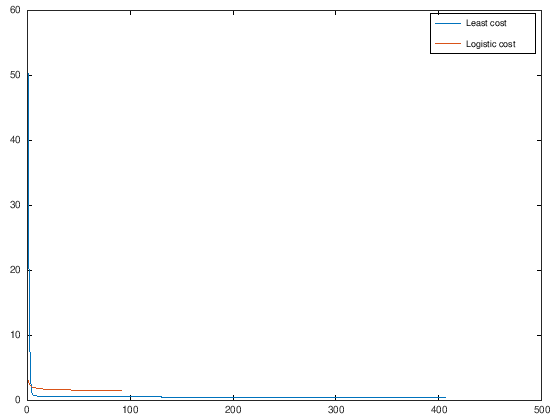

In [8]:
plot(funcVal, "displayname", "Least cost")
hold on 
plot(funcValLogistic, "displayname", "Logistic cost")
legend()

In [9]:
C_pred

C_pred =

 Columns 1 through 8:

  -0.77233   0.90919   1.50605  -0.84097   1.01015   0.86876   2.01476   0.23565

 Columns 9 and 10:

  -0.15645   1.56939



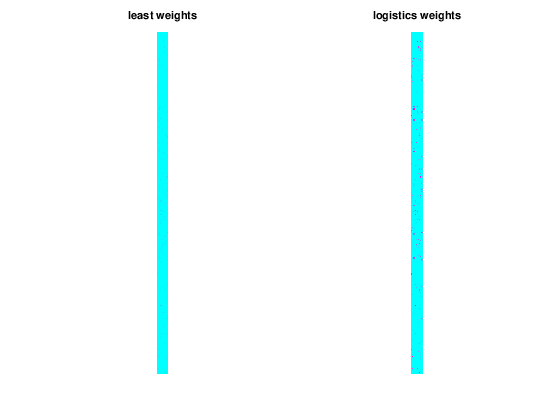

In [10]:
subplot (1, 2, 1);
imshow(W_pred ,"colormap", colormap('cool'));
title('least weights')
subplot (1, 2, 2);
imshow(W_pred_logistics ,"colormap", colormap('cool'));
title('logistics weights')